<a href="https://colab.research.google.com/github/saransh317/Stock-Market-Prediction/blob/main/Reliance_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

LSTM

In [2]:
def plot_predictions(test, predicted):
  plt.plot(test, color='red', label='Real Reliance Stock Price')
  plt.plot(predicted, color='blue', label='Predicted Reliance Stock Price')
  plt.title("Stock Price Prediction")
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

In [3]:
dataset = pd.read_csv('/content/RELIANCE.NS.csv', index_col='Date',
                      parse_dates=['Date'])
dataset.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,1940.599976,1965.000000,1940.599976,1958.199951,1958.199951,8418767.0
2020-12-08,1961.150024,2014.250000,1950.000000,1993.750000,1993.750000,20030506.0
2020-12-09,2009.949951,2033.800049,1999.250000,2026.949951,2026.949951,13464375.0
2020-12-10,2021.599976,2028.500000,2001.000000,2007.000000,2007.000000,7414229.0
2020-12-11,2013.000000,2038.000000,1974.250000,2005.800049,2005.800049,12434745.0


In [9]:
dataset["High"].isnull().values.any()

True

In [14]:
dataset["High"].isnull().sum()

127

In [17]:
print(dataset.shape)
dataset.dropna(inplace=True)
dataset.shape

(6291, 6)


(6164, 6)

In [18]:
training_set = dataset[:'2019'].iloc[:,1:2].values
test_set = dataset['2019':].iloc[:,1:2].values
training_set.shape

(5927, 1)

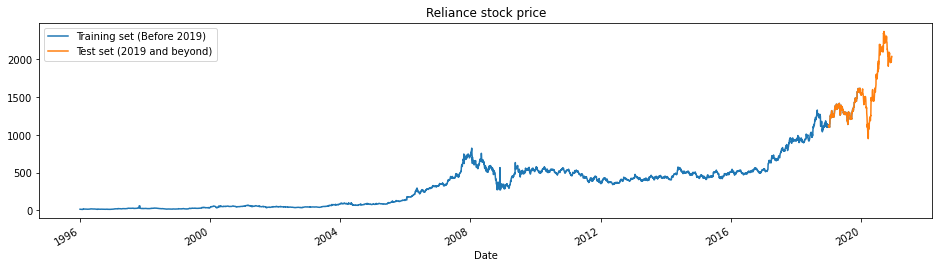

In [19]:
dataset["High"][:'2019'].plot(figsize=(16,4),legend=True)
dataset["High"]['2019':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2019)','Test set (2019 and beyond)'])
plt.title('Reliance stock price')
plt.show()

In [20]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [21]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
training_set_scaled.shape

(5927, 1)

In [22]:
for i in range(60,5927):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [24]:
#RNN Architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
model.fit(X_train, y_train, epochs=40, batch_size=128)

Epoch 1/40
46/46 [==============================] - 10s 210ms/step - loss: 0.0067
Epoch 2/40
46/46 [==============================] - 10s 209ms/step - loss: 0.0015
Epoch 3/40
46/46 [==============================] - 10s 208ms/step - loss: 0.0014
Epoch 4/40
46/46 [==============================] - 10s 209ms/step - loss: 0.0014
Epoch 5/40
46/46 [==============================] - 10s 209ms/step - loss: 0.0013
Epoch 6/40
46/46 [==============================] - 10s 211ms/step - loss: 0.0012
Epoch 7/40
46/46 [==============================] - 10s 210ms/step - loss: 0.0011
Epoch 8/40
46/46 [==============================] - 10s 212ms/step - loss: 0.0010
Epoch 9/40
46/46 [==============================] - 10s 212ms/step - loss: 0.0011
Epoch 10/40
46/46 [==============================] - 10s 212ms/step - loss: 9.5205e-04
Epoch 11/40
46/46 [==============================] - 10s 210ms/step - loss: 9.9879e-04
Epoch 12/40
46/46 [==============================] - 10s 211ms/step - loss: 0.0010
Epoch

KeyboardInterrupt: ignored

In [27]:
dataset_total = pd.concat((dataset["High"][:'2019'], dataset['High']['2019':]), axis=0)
input = dataset_total[len(dataset_total) - len(test_set) - 60:].values
input = input.reshape(-1,1)
inputs = sc.transform(input)

In [28]:
inputs.shape

(539, 1)

In [29]:
X_test = []
for i in range(60,539):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

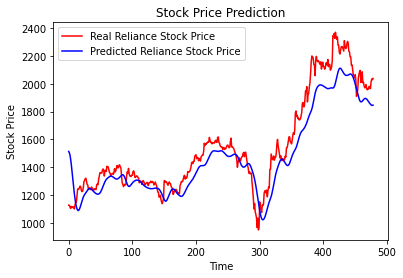

In [30]:
plot_predictions(test_set,predicted_stock_price)